<a href="https://colab.research.google.com/github/salauddinkhan1986/Kmeans-cluster-project/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K_Mean Clustering project**


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [28]:
df.shape

(683277, 22)

In [29]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [30]:
Missing_value = df.isna().sum()
Missing_value

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [31]:
df = df.dropna()


In [32]:
Missing_value = df.isna().sum()
Missing_value

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [33]:
colas = df.columns
for col in colas:
  print(col,'has:',df[col].nunique(),'unique_value')

Organization Group Code has: 7 unique_value
Job Family Code has: 59 unique_value
Job Code has: 1210 unique_value
Year Type has: 2 unique_value
Year has: 8 unique_value
Organization Group has: 7 unique_value
Department Code has: 60 unique_value
Department has: 109 unique_value
Union Code has: 70 unique_value
Union has: 129 unique_value
Job Family has: 59 unique_value
Job has: 1348 unique_value
Employee Identifier has: 309658 unique_value
Salaries has: 498267 unique_value
Overtime has: 261976 unique_value
Other Salaries has: 307729 unique_value
Total Salary has: 614930 unique_value
Retirement has: 451568 unique_value
Health and Dental has: 209844 unique_value
Other Benefits has: 496051 unique_value
Total Benefits has: 616180 unique_value
Total Compensation has: 658354 unique_value


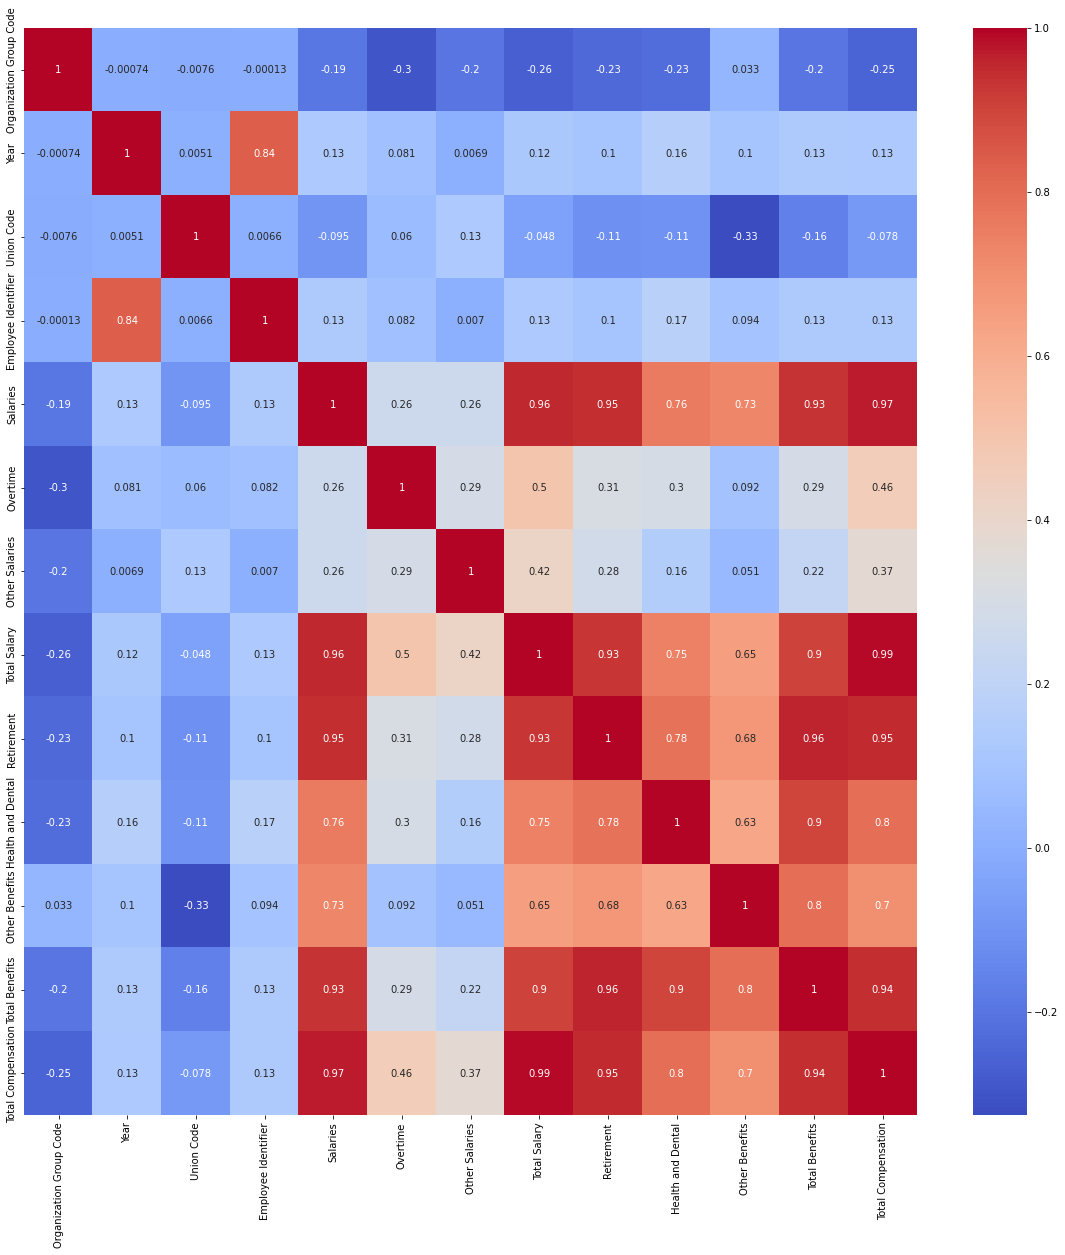

In [35]:
plt.figure(figsize=(20,20))
corre = df.corr()
sns.heatmap(corre,annot=True,cmap='coolwarm')
plt.show()

In [36]:
df.drop({'Organization Group Code','Year','Union Code','Employee Identifier','Overtime','Other Salaries'},axis=1,inplace=True)

In [37]:
df.dtypes

Job Family Code        object
Job Code               object
Year Type              object
Organization Group     object
Department Code        object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Total Salary          float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Benefits        float64
Total Compensation    float64
dtype: object

In [38]:
df1 = df.select_dtypes(include=('int64','float64'))
df1.columns

Index(['Salaries', 'Total Salary', 'Retirement', 'Health and Dental',
       'Other Benefits', 'Total Benefits', 'Total Compensation'],
      dtype='object')

In [39]:
df1.head()

,Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,57534.65,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,57678.50,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,63532.93,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,101274.51,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,5084.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [40]:
df1.drop(['Salaries', 'Total Salary','Other Benefits', 'Total Benefits'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df1.head()

,Retirement,Health and Dental,Total Compensation
0,11253.16,11961.34,85281.78
1,10284.88,7176.80,79895.32
2,12495.83,12918.24,93649.71
3,19644.45,12918.24,134237.37
4,1083.90,956.91,7512.31


In [42]:
df1['health and retirement']=df1['Retirement']+df1['Health and Dental']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df1.drop(['Retirement','Health and Dental'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df1.head()

,Total Compensation,health and retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(n_clusters=3)

In [47]:
print(kmeans.cluster_centers_)

[[ 23518.27582635   5000.76397298]
 [115617.47244135  27626.58697163]
 [207690.52132629  41424.03231619]]


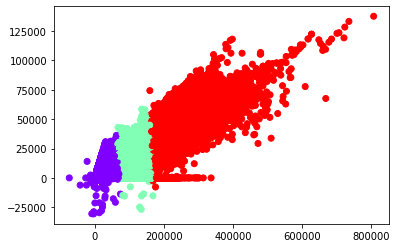

In [48]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1].values,c=kmeans.labels_,cmap='rainbow')
plt.show()

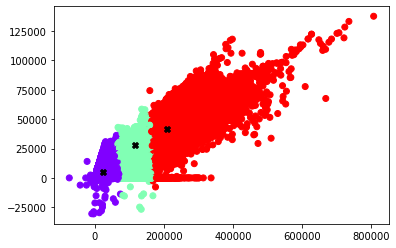

In [49]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1].values,c=kmeans.labels_,cmap='rainbow')
centers=np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],marker='X',color='k')
plt.show()